In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, PowerTransformer
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.metrics import *

In [2]:
data = pd.read_csv('Iris.csv')
data.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


## -------------------------------------------------------------------------------------------------

In [3]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [4]:
df = data.iloc[:, [1,2,3,4]]
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [5]:
sc = StandardScaler()
Xs = sc.fit_transform(df)
Xs = pd.DataFrame(Xs, columns = df.columns)
Xs.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977


In [6]:
Xs.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


## KMeans

In [7]:
wcss = []
for i in range(1,10):
    km = KMeans(n_clusters = i, n_init = 15)
    km.fit(Xs)

    wcss.append(km.inertia_)

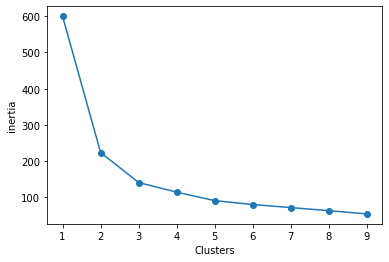

In [8]:
plt.plot(np.arange(1,10), wcss, marker = 'o')
plt.xlabel('Clusters')
plt.ylabel('inertia')
plt.show()

In [9]:
sil = []
for i in range(2,10):
    km = KMeans(n_clusters = i, n_init = 15)
    km.fit(Xs)

    sil.append(silhouette_score(Xs, km.labels_))

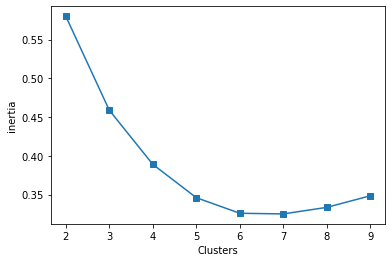

In [10]:
plt.plot(np.arange(2,10), sil, marker = 's')
plt.xlabel('Clusters')
plt.ylabel('inertia')
plt.show()

In [11]:
km = KMeans(n_clusters = 3, n_init = 15)
km.fit(Xs)

KMeans(n_clusters=3, n_init=15)

In [12]:
print('Inertia is :', km.inertia_)
print('Silhouette Score is :', silhouette_score(Xs, km.labels_))

Inertia is : 140.96581663074699
Silhouette Score is : 0.4589717867018717


In [13]:
label = pd.Series(km.labels_)
label.value_counts()

1    53
0    50
2    47
dtype: int64

In [14]:
g1 = data.groupby('Species')

In [15]:
data_cen = g1[data.columns[1:5]].mean()
data_cen

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


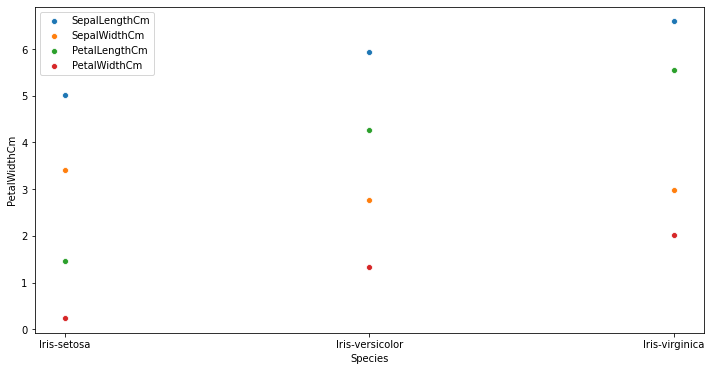

In [16]:
plt.figure(figsize = (12,6))
for i in data_cen.columns:
    sns.scatterplot(x = data_cen.index, y = data_cen[i], label = i)
plt.legend()
plt.show()

In [17]:
dfk = pd.concat([Xs, label], axis = 1)
dfk.rename({0 : 'labels'}, axis = 1, inplace = True)
dfk.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,labels
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0


In [18]:
km_cen = pd.DataFrame(km.cluster_centers_, columns = Xs.columns)
km_cen

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.014579,0.842307,-1.304878,-1.255129
1,-0.050220,-0.880292,0.347532,0.282063
2,1.135970,0.096598,0.996271,1.017172


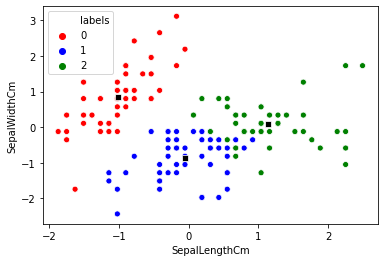

In [19]:
sns.scatterplot(dfk['SepalLengthCm'], y = dfk['SepalWidthCm'], hue = dfk['labels'],
                palette = ['r', 'b', 'g'])
sns.scatterplot(km_cen['SepalLengthCm'], km_cen['SepalWidthCm'], color = 'black', marker = 's')
plt.show()

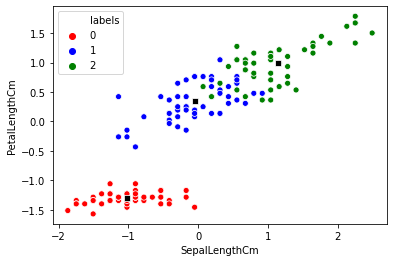

In [20]:
sns.scatterplot(dfk['SepalLengthCm'], y = dfk['PetalLengthCm'], hue = dfk['labels'],
                palette = ['r', 'b', 'g'])
sns.scatterplot(km_cen['SepalLengthCm'], km_cen['PetalLengthCm'], color = 'black', marker = 's')
plt.show()

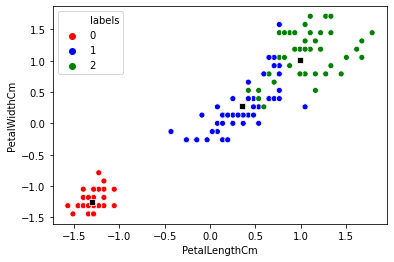

In [21]:
sns.scatterplot(dfk['PetalLengthCm'], y = dfk['PetalWidthCm'], hue = dfk['labels'],
                palette = ['r', 'b', 'g'])
sns.scatterplot(km_cen['PetalLengthCm'], km_cen['PetalWidthCm'], color = 'black', marker = 's')
plt.show()

## Hierarchical/Agglomerative

In [22]:
for metd in ['single', 'complete', 'average']:
    print('Linkage is', metd)
    for metr in ['euclidean', 'cityblock', 'cosine']:
        Z = linkage(Xs, method = metd, metric = metr)
        c, coph_dis = cophenet(Z, pdist(Xs))
        print(f'Cophenetic Distance Correlation Coefficient for {metr} metric is:', c)
    print()

Z = linkage(Xs, method = 'ward')
c, coph_dis = cophenet(Z, pdist(Xs))
print('Cophenetic Distance Correlation Coefficient for ward linkage is:', c)

Linkage is single
Cophenetic Distance Correlation Coefficient for euclidean metric is: 0.8280881760287518
Cophenetic Distance Correlation Coefficient for cityblock metric is: 0.8276185615632744
Cophenetic Distance Correlation Coefficient for cosine metric is: 0.7761026893332944

Linkage is complete
Cophenetic Distance Correlation Coefficient for euclidean metric is: 0.7512273718088645
Cophenetic Distance Correlation Coefficient for cityblock metric is: 0.7189034961616892
Cophenetic Distance Correlation Coefficient for cosine metric is: 0.6615593211884304

Linkage is average
Cophenetic Distance Correlation Coefficient for euclidean metric is: 0.8532224412681922
Cophenetic Distance Correlation Coefficient for cityblock metric is: 0.8393770547365786
Cophenetic Distance Correlation Coefficient for cosine metric is: 0.8057217690384748

Cophenetic Distance Correlation Coefficient for ward linkage is: 0.8225754331448963


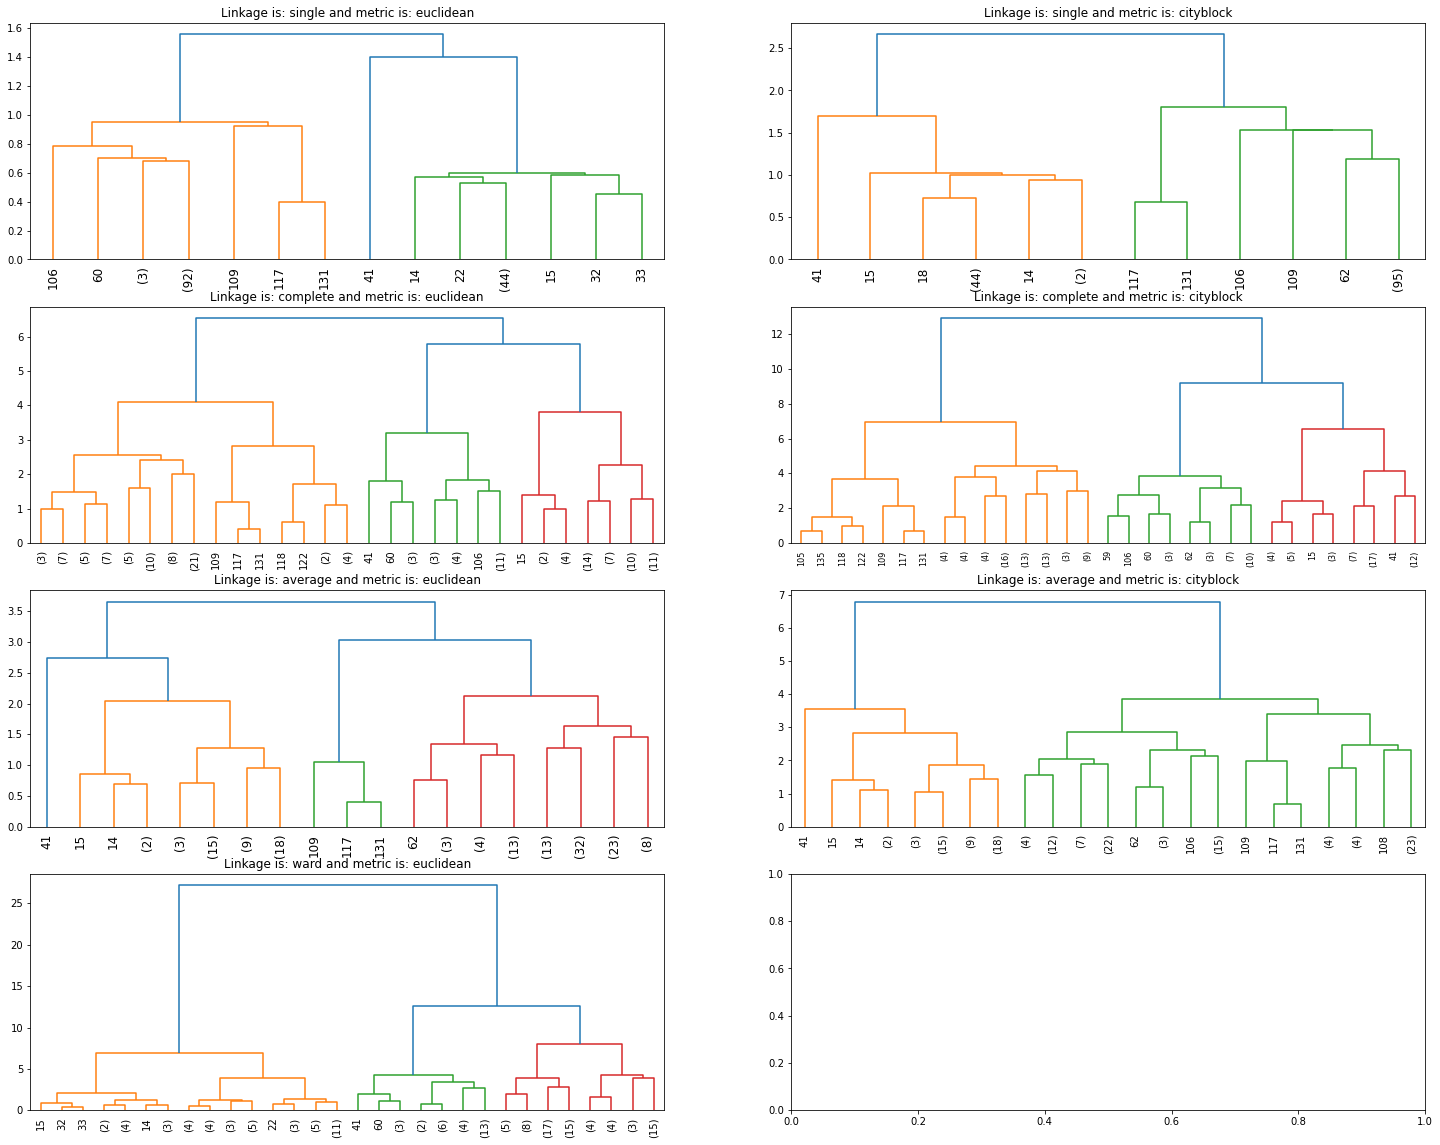

In [23]:
fig, axes = plt.subplots(4,2, figsize = (25,20))
axes = axes.flatten()
i = 0
for metd in ['single', 'complete', 'average']:
    for metr in ['euclidean', 'cityblock']:
        Z = linkage(Xs, method = metd, metric = metr)
        dendrogram(Z, leaf_rotation = 90, truncate_mode = 'level', p = 4, ax = axes[i])
        axes[i].set_title(f'Linkage is: {metd} and metric is: {metr}')
        i += 1

Z = linkage(Xs, method = 'ward')
dendrogram(Z, leaf_rotation = 90, truncate_mode = 'level', p = 4, ax = axes[i], color_threshold = 10)
axes[i].set_title('Linkage is: ward and metric is: euclidean')

plt.show()

## -------------------------------------------------------------------------------------------

## PCA

In [24]:
pca  = PCA(n_components = 0.95)
X_pca = pd.DataFrame(pca.fit_transform(Xs))
X_pca.shape

(150, 2)

In [25]:
wcss = []
for i in range(1,10):
    km = KMeans(n_clusters = i, n_init = 15)
    km.fit(X_pca)

    wcss.append(km.inertia_)

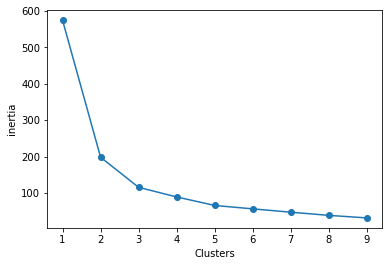

In [26]:
plt.plot(np.arange(1,10), wcss, marker = 'o')
plt.xlabel('Clusters')
plt.ylabel('inertia')
plt.show()

In [27]:
sil = []
for i in range(2,10):
    km = KMeans(n_clusters = i, n_init = 15)
    km.fit(X_pca)

    sil.append(silhouette_score(X_pca, km.labels_))

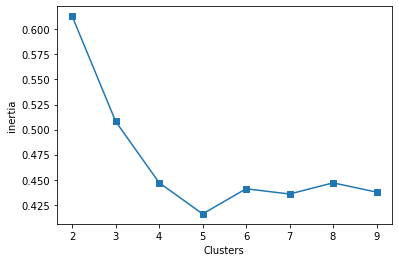

In [28]:
plt.plot(np.arange(2,10), sil, marker = 's')
plt.xlabel('Clusters')
plt.ylabel('inertia')
plt.show()

In [29]:
km = KMeans(n_clusters = 3, n_init = 15)
km.fit(X_pca)

KMeans(n_clusters=3, n_init=15)

In [30]:
print('Inertia is :', km.inertia_)
print('Silhouette Score is :', silhouette_score(X_pca, km.labels_))

Inertia is : 116.1092402140154
Silhouette Score is : 0.5081546339516391


In [31]:
label = pd.Series(km.labels_)
label.value_counts()

2    53
1    50
0    47
dtype: int64

In [32]:
for metd in ['single', 'complete', 'average']:
    print('Linkage is', metd)
    for metr in ['euclidean', 'cityblock', 'cosine']:
        Z = linkage(X_pca, method = metd, metric = metr)
        c, coph_dis = cophenet(Z, pdist(X_pca))
        print(f'Cophenetic Distance Correlation Coefficient for {metr} metric is:', c)
    print()

Z = linkage(X_pca, method = 'ward')
c, coph_dis = cophenet(Z, pdist(X_pca))
print('Cophenetic Distance Correlation Coefficient for ward linkage is:', c)

Linkage is single
Cophenetic Distance Correlation Coefficient for euclidean metric is: 0.8344961745462142
Cophenetic Distance Correlation Coefficient for cityblock metric is: 0.832520166300752
Cophenetic Distance Correlation Coefficient for cosine metric is: 0.803169272015486

Linkage is complete
Cophenetic Distance Correlation Coefficient for euclidean metric is: 0.6430600544454153
Cophenetic Distance Correlation Coefficient for cityblock metric is: 0.7437151342923378
Cophenetic Distance Correlation Coefficient for cosine metric is: 0.6864716896322818

Linkage is average
Cophenetic Distance Correlation Coefficient for euclidean metric is: 0.851045431562611
Cophenetic Distance Correlation Coefficient for cityblock metric is: 0.8616817240542345
Cophenetic Distance Correlation Coefficient for cosine metric is: 0.822059396709682

Cophenetic Distance Correlation Coefficient for ward linkage is: 0.8396697744446565


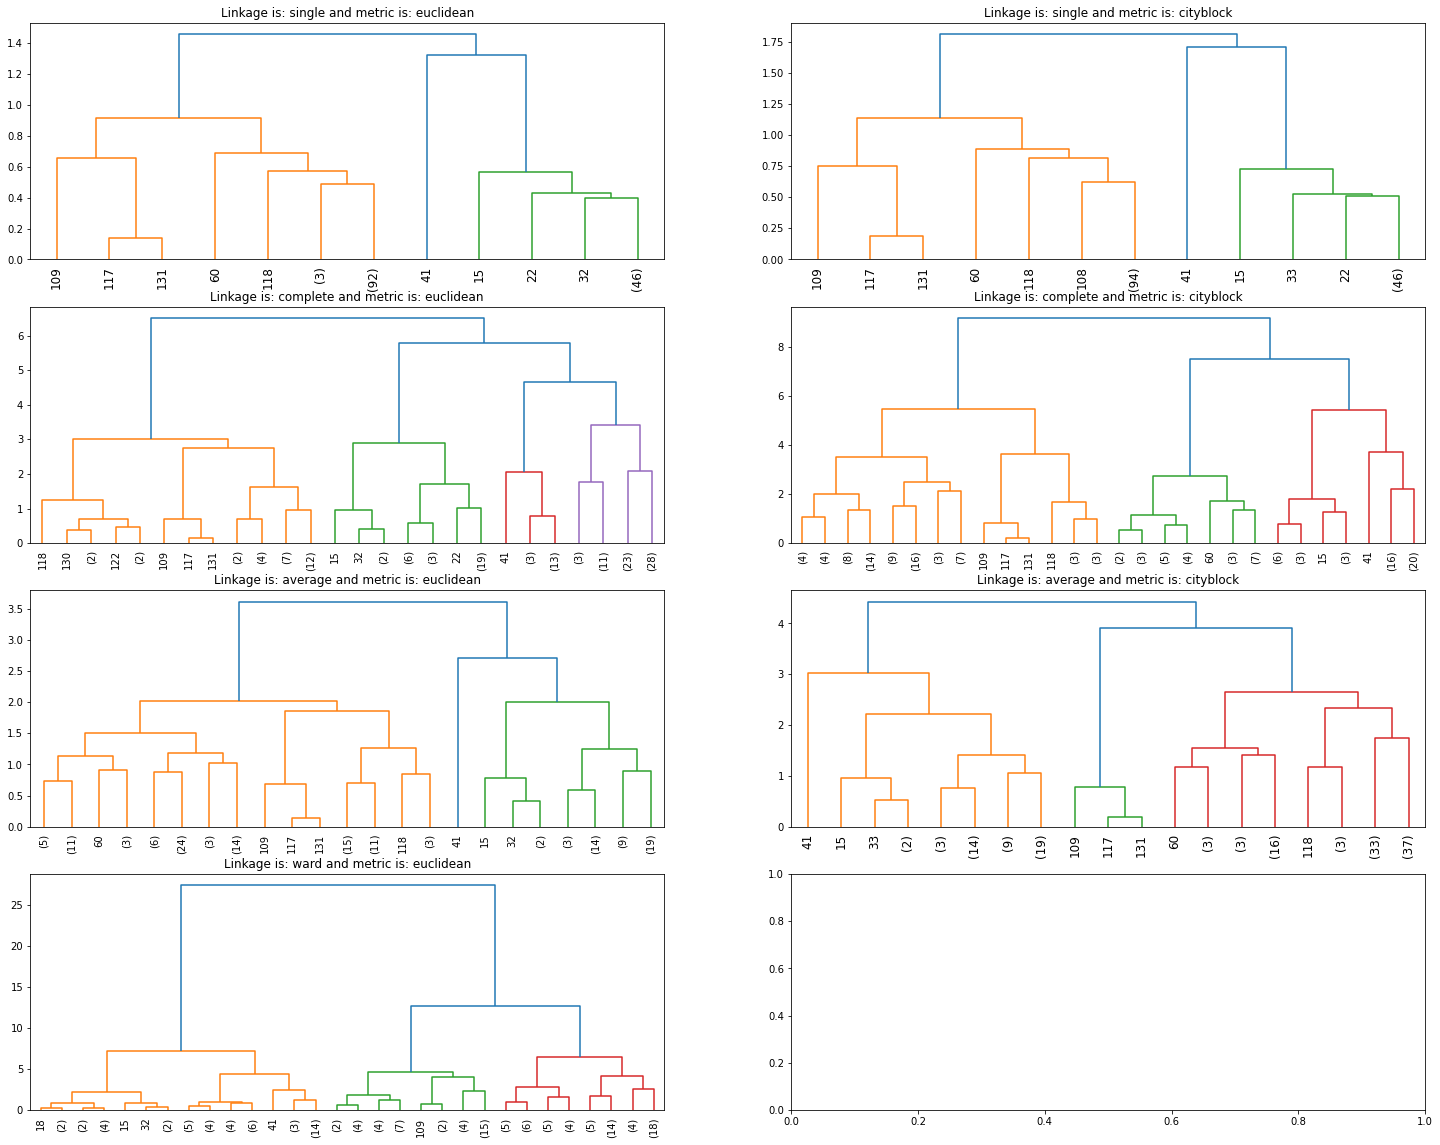

In [33]:
fig, axes = plt.subplots(4,2, figsize = (25,20))
axes = axes.flatten()
i = 0
for metd in ['single', 'complete', 'average']:
    for metr in ['euclidean', 'cityblock']:
        Z = linkage(X_pca, method = metd, metric = metr)
        dendrogram(Z, leaf_rotation = 90, truncate_mode = 'level', p = 4, ax = axes[i])
        axes[i].set_title(f'Linkage is: {metd} and metric is: {metr}')
        i += 1

Z = linkage(X_pca, method = 'ward')
dendrogram(Z, leaf_rotation = 90, truncate_mode = 'level', p = 4, ax = axes[i], color_threshold = 10)
axes[i].set_title('Linkage is: ward and metric is: euclidean')

plt.show()

### After applying PCA, quality of clusters has improved which is evident from Inertia and Silhouette Score.